### A Quick Review of Linear Regression

In [1]:
import os
import random
# mports NumPy.
import numpy as np
# Imports matplotlib.
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

In [2]:
# Generates an evenly spaced grid of floats for the x values between 0 and 10.
x = np.linspace(0, 10)

In [3]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
# Fixes the seed values for all relevant random number generators.
set_seeds()

In [4]:
# Generates the randomized data for the y values.
y = x + np.random.standard_normal(len(x))

In [5]:
# OLS regression of degree 1 (that is, linear regression) is conducted.
reg = np.polyfit(x, y, deg=1)

In [6]:
# Shows the optimal parameter values.
reg

array([0.94612934, 0.22855261])

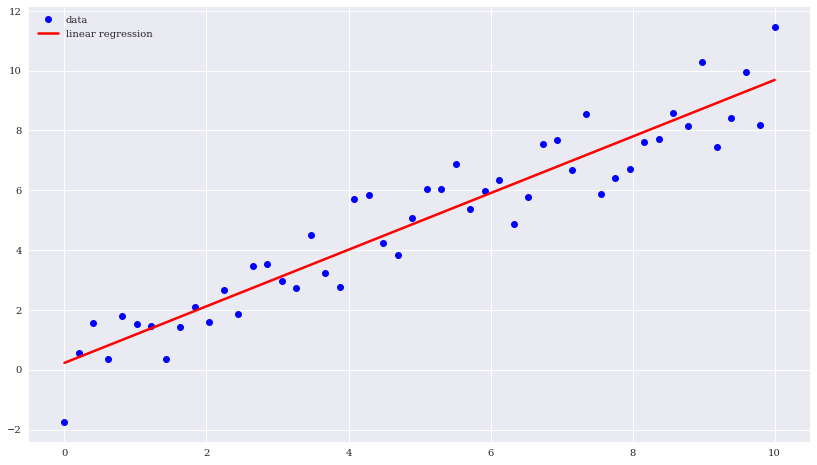

In [7]:
# Creates a new figure object.
plt.figure(figsize=(14, 8))
# Plots the original data set as dots.
plt.plot(x, y, 'bo', label='data')
# Plots the regression line.
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5, label='linear regression')
# Creates the legend.
plt.legend(loc=0)

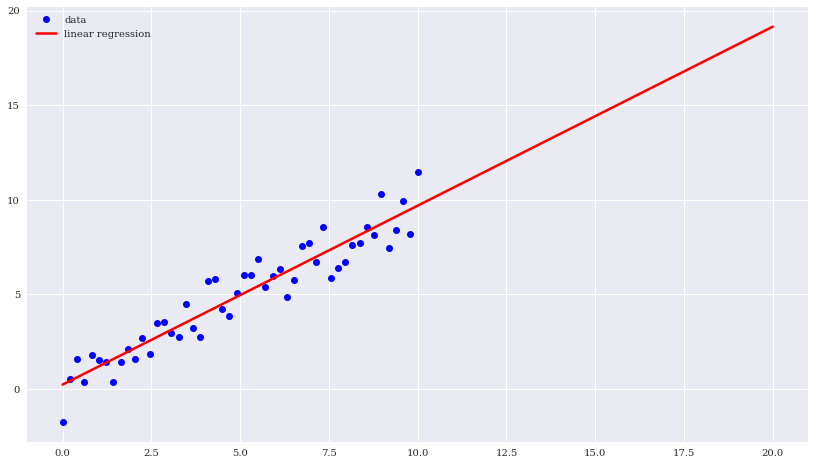

In [8]:
plt.figure(figsize=(14, 8))
plt.plot(x, y, 'bo', label='data')
# Generates an enlarged domain for the x values.
xn = np.linspace(0, 20)
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5, label='linear regression')
plt.legend(loc=0)

### The Basic Idea for Price Prediction

In [9]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
# Defines the number of lags.
lags = 3
# Instantiates an ndarray object with the appropriate dimensions.
m = np.zeros((lags + 1, len(x) - lags))

In [11]:
# Defines the target values (dependent variable).
m[lags] = x[lags:]
# Iterates over the numbers from 0 to lags - 1.
for i in range(lags):
    # Defines the basis vectors (independent variables)
    m[i] = x[i:i - lags]

In [12]:
# Shows the transpose of the ndarray object m.
m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [13]:
# Implements the linear OLS regression.
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]

In [14]:
# Prints out the optimal parameters.
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [15]:
# The dot product yields the prediction results.
np.dot(m[:lags].T, reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### Predicting Index Levels

In [16]:
# Imports the pandas package.
import pandas as pd

In [17]:
# Retrieves end-of-day (EOD) data and stores it in a DataFrame object.
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [18]:
symbol = 'EUR='

In [19]:
# The time series data for the specified symbol is selected from the original Data
# Frame.
data = pd.DataFrame(raw[symbol])

In [20]:
# Renames the single column to price.
data.rename(columns={symbol: 'price'}, inplace=True)

In [21]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    # Takes the price column and shifts it by lag.
    data[col] = data['price'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [22]:
data

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412
...,...,...,...,...,...,...
2019-12-24,1.1087,1.1086,1.1078,1.1120,1.1111,1.1149
2019-12-26,1.1096,1.1087,1.1086,1.1078,1.1120,1.1111
2019-12-27,1.1175,1.1096,1.1087,1.1086,1.1078,1.1120


In [23]:
reg = np.linalg.lstsq(data[cols], data['price'], rcond=None)[0]

In [24]:
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

In [25]:
# Calculates the prediction values as the dot product.
data['prediction'] = np.dot(data[cols], reg)

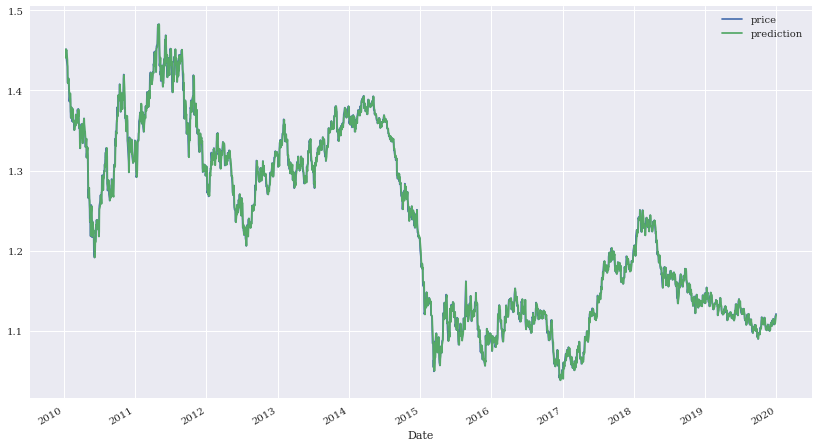

In [26]:
# Plots the price and prediction columns.
data[['price', 'prediction']].plot(figsize=(14, 8));

<AxesSubplot:xlabel='Date'>

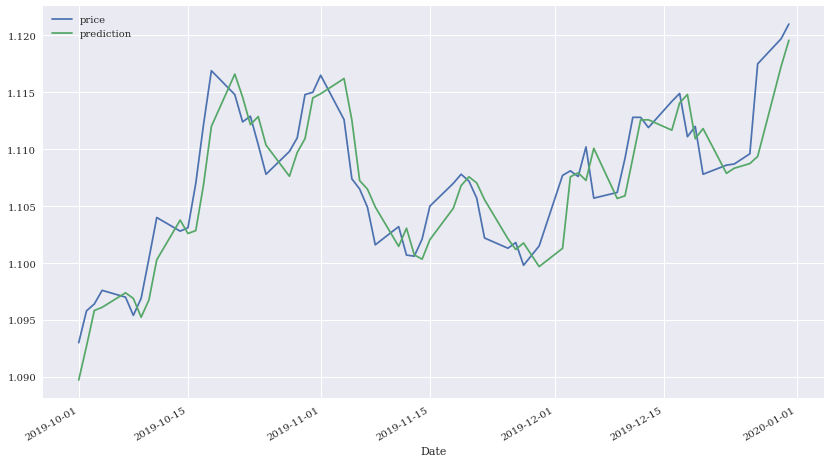

In [27]:
data[['price', 'prediction']].loc['2019-10-1':].plot(figsize=(14, 8))

### Predicting Future Returns

In [28]:
# Calculates the log returns.
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [29]:
# Deletes all lines with NaN values.
data.dropna(inplace=True)

In [30]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    # Takes the returns column for the lagged data.
    data[col] = data['return'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [31]:
reg = np.linalg.lstsq(data[cols], data['return'], rcond=None)[0]

In [32]:
reg

array([-0.015689  ,  0.00890227, -0.03634858,  0.01290924, -0.00636023])

<AxesSubplot:xlabel='Date'>

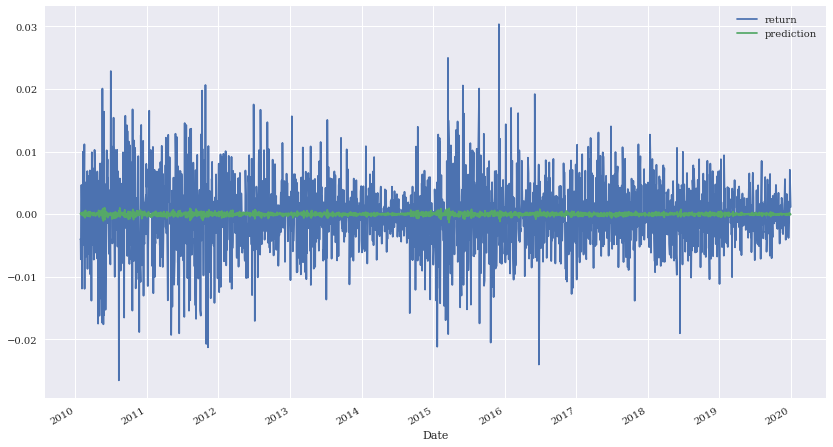

In [33]:
data['prediction'] = np.dot(data[cols], reg)
data[['return', 'prediction']].iloc[lags:].plot(figsize=(14, 8))

In [34]:
# Calculates the product of the market and predicted return, takes the sign of the
# results and counts the values.
hits = np.sign(data['return'] * data['prediction']).value_counts()

In [35]:
# Prints out the counts for the two possible values.
hits

 1.0    1250
-1.0    1242
 0.0      13
dtype: int64

In [36]:
# Calculates the hit ratio defined as the number of correct predictions given all
# predictions.
hits.values[0] / sum(hits)

0.499001996007984

### Predicting Future Market Direction

In [37]:
# This directly uses the sign of the return to be predicted for the regression.
reg = np.linalg.lstsq(data[cols], np.sign(data['return']), rcond=None)[0]

In [38]:
# Also, for the prediction step, only the sign is relevant.
data['prediction'] = np.sign(np.dot(data[cols], reg))

In [39]:
data['prediction'].value_counts()

 1.0    1300
-1.0    1205
Name: prediction, dtype: int64

In [40]:
hits = np.sign(data['return'] * data['prediction']).value_counts()
hits

 1.0    1301
-1.0    1191
 0.0      13
dtype: int64

In [41]:
hits.values[0] / sum(hits)

0.5193612774451097

### Vectorized Backtesting of Regression-Based Strategy

In [42]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,1.0,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,1.0,-0.000780
2010-01-22,1.4137,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,1.0,0.003330
2010-01-25,1.4150,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,1.0,0.000919
2010-01-26,1.4073,0.000919,0.003330,-0.000780,-0.013874,-0.005858,1.0,-0.005457


In [43]:
# Multiplies the prediction values (positionings) by the market returns.
data['strategy'] = data['prediction'] * data['return']

In [44]:
# Calculates the gross performance of the base instrument and the strategy.
data[['return', 'strategy']].sum().apply(np.exp)

return      0.784026
strategy    1.654154
dtype: float64

<AxesSubplot:xlabel='Date'>

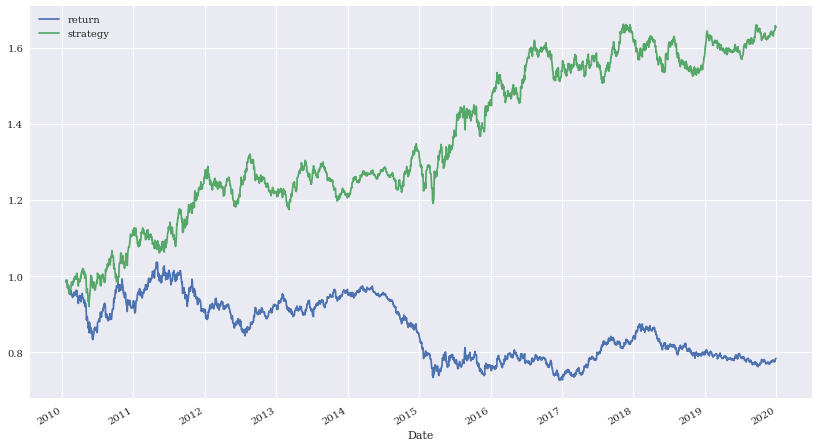

In [45]:
# Plots the gross performance of the base instrument and the strategy over time
# (in-sample, no transaction costs).
data[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(14, 8))

### Generalizing the Approach

In [46]:
# Imports the module as LR.
from scripts.lr_vector_backtester import LRVectorBacktester

In [47]:
# Instantiates an object of the LRVectorBacktester class.
lrbt = LRVectorBacktester('EUR=', '2010-1-1', '2019-12-31', 10000, 0.0)

In [48]:
# Trains and evaluates the strategy on the same data set.
lrbt.run_strategy('2010-1-1', '2019-12-31', '2010-1-1', '2019-12-31', lags=5)

(17166.53, 9442.42)

In [49]:
# Uses two different data sets for the training and evaluation steps.
lrbt.run_strategy('2010-1-1', '2017-12-31', '2018-1-1', '2019-12-31', lags=5)

(10160.86, 791.87)

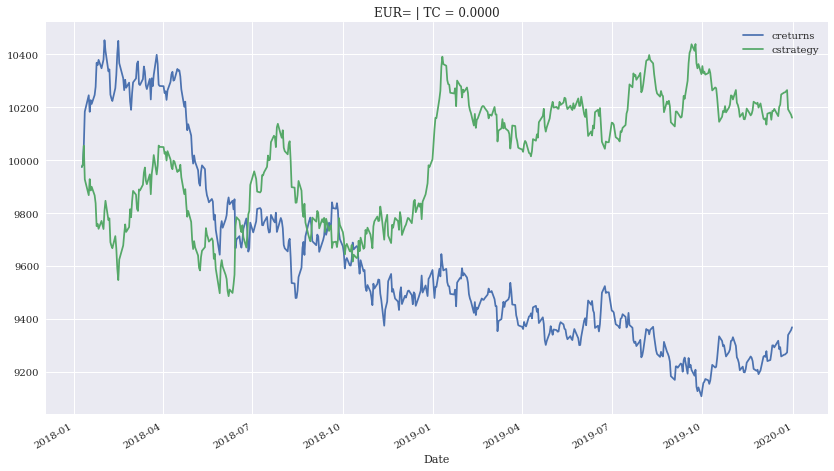

In [50]:
# Plots the out of sample strategy performance compared to the market.
lrbt.plot_results()

In [51]:
# Changes to the time series data for GDX.
lrbt = LRVectorBacktester('GDX', '2010-1-1', '2019-12-31', 10000, 0.002)

In [52]:
lrbt.run_strategy('2010-1-1', '2019-12-31', '2010-1-1', '2019-12-31', lags=7)

(23642.32, 17649.69)

In [53]:
lrbt.run_strategy('2010-1-1', '2014-12-31', '2015-1-1', '2019-12-31', lags=7)

(28513.35, 14888.41)

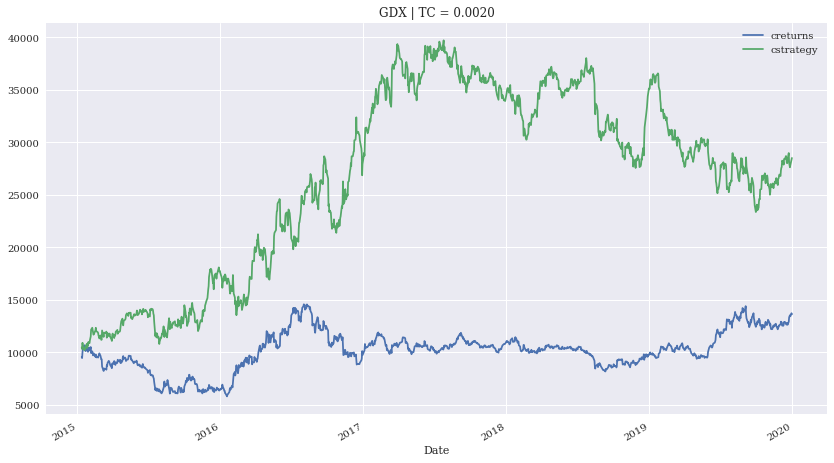

In [54]:
lrbt.plot_results()

### Using Machine Learning for Market Movement Prediction

### Linear Regression with scikit-learn

In [55]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [56]:
lags = 3

In [57]:
m = np.zeros((lags + 1, len(x) - lags))

In [58]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]

In [59]:
m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

Using scikit-learn for our purposes mainly consists of three steps:
1. Model selection: a model is to be picked and instantiated.
2. Model fitting: the model is to be fitted to the data at hand.
3. Prediction: given the fitted model, the prediction is conducted.

In [60]:
# Imports the generalized linear model classes.
from sklearn import linear_model

In [61]:
# Instantiates a linear regression model.
lm = linear_model.LinearRegression()

In [62]:
# Fits the model to the data.
lm.fit(m[:lags].T, m[lags])

LinearRegression()

In [63]:
# Prints out the optimal regression parameters.
lm.coef_

array([0.33333333, 0.33333333, 0.33333333])

In [64]:
# Prints out the intercept values.
lm.intercept_

2.0

In [65]:
# Predicts the sought after values given the fitted model.
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [66]:
# Forces a fit without intercept value.
lm = linear_model.LinearRegression(fit_intercept=False)

In [67]:
lm.fit(m[:lags].T, m[lags])

LinearRegression(fit_intercept=False)

In [68]:
lm.coef_

array([-0.66666667,  0.33333333,  1.33333333])

In [69]:
lm.intercept_

0.0

In [70]:
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])